**_Section 9.0:_** Load packages

In [1]:
import pandas as pd
import numpy as np

# Statsmodels logistic regression is sm.Logit
import statsmodels.api as sm

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn import grid_search, cross_validation

%matplotlib inline

/Users/dat-44pt/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/dat-44pt/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/dat-44pt/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  

### _Section 9.1_
#### Guided Practice: Logit Function and Odds
```diff
+ The following section provides an opportunity for the student to create logit and sigmoid functions "from scratch", as well as an example data set for converting odds into probability using those functions.
```

In [2]:
def logit_func(odds):
    # uses a float (odds) and returns back the log odds (logit)
    return None

def sigmoid_func(logit):
    # uses a float (logit) and returns back the probability
    return None

odds_set = [
    5./1,
    20./1,
    1.1/1,
    1.8/1,
    1.6/1
]

### _Section 9.2_
#### Implement logistic regression with college admissions data
```diff
+ The following section provides an opportunity for the student to implement an existing sklearn model - LogisticRegression, and then examine its output.
```

In [9]:
# Read in the data
df = pd.read_csv('./dataset/collegeadmissions.csv')

df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
df = df.join(pd.get_dummies(df['rank']))

df.head()

,admit,gre,gpa,rank,1,2,3,4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [5]:
lm = LogisticRegression()
X = df[['gre', 'gpa', 1, 2, 3,]]
y = df['admit']

lm.fit(X, y)

predictions = lm.predict_proba(X)[:,1]

print(lm.coef_)
print(lm.intercept_)
print(df.admit.mean())

[[ 1.63913356e-03  4.33354115e-04  1.15220976e+00  5.14395667e-01
  -3.62326171e-02]]
[-2.09315183]
0.3175


### _Section 9.3_
#### Classification metrics: Confusion matrices, etc.
```diff
+ The following section provides an opportunity for the student to implement classification metrics, and present the results in a popular format - the ROC curve, which will be useful for working through the Titanic problem.
```

Below the ROC curve is based on various thresholds: it shows with a false positive rate (x-axis) ~0, it also expects a true positive rate (y-axis) ~0 (the same, ish, for the top right hand of the figure).

This chart will help you compare models and determine where the decision line should exist for the data.

accuracy: 0.7


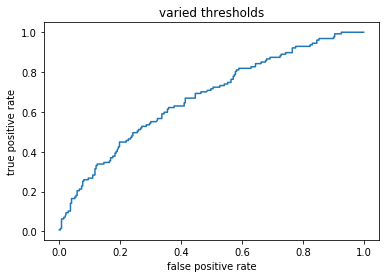

In [6]:
fpr, tpr, _ = roc_curve(y, predictions)

threshold = 0.5
predicted_classes = (predictions > threshold).astype(int)

print('accuracy: ' + str(accuracy_score(y, predicted_classes)))

plt.plot(fpr, tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('varied thresholds')

plt.show()

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [7]:
roc_auc_score(df['admit'], lm.predict(df[['gre', 'gpa', 1, 2, 3,]]))

0.5591416457558189

In [8]:
roc_curve(df['admit'], lm.predict(df[['gre', 'gpa', 1, 2, 3,]]))

(array([0.        , 0.05494505, 1.        ]),
 array([0.        , 0.17322835, 1.        ]),
 array([2, 1, 0]))

### _Section 9.4_
#### Independent Practice: Evaluating Logistic Regression with Alternative Metrics
#### "A _Titanic_ Problem"
```diff
+ The following section provides a more in-depth opportunity to implement classification metrics using a more elaborate data set. The emphasis here should be on comparing alternative metrics and selecting the most appropriate one.
```

** Goals **

1. Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn. But a worst case scenario; identify one or two strong features that would be useful to include in the model.
2. Spend 1-2 minutes considering which _metric_ makes the most sense to optimize. Accuracy? FPR or TPR? AUC? Given the business problem (understanding survival rate aboard the Titanic), why should you use this metric?
3. Build a tuned Logistic model. Be prepared to explain your design (including regularization), metric, and feature set in predicting survival using the tools necessary (such as a fit chart).